Мною был выбран датасет ["Mental Health & Social Media Balance Dataset"](https://www.kaggle.com/datasets/prince7489/mental-health-and-social-media-balance-dataset?resource=download)

<u>Предметная область</u>: медицина

<u>Источник данных</u>: синтетически сгенерированные.

<u>Характер данных</u>: иммитационный (но автор пишет следующее: _All values are created using realistic statistical distributions to simulate genuine patterns of social media usage and mental health variables_).

__Атрибуты, представленный в датасете__:
- User_ID: числовой, id-ключ каждого респондента
- Age: числовой, возраст респондента
- Gender: строковый, пол респондента
- Daily_Screen_Time(hrs): числовой, экранное время
- Sleep_Quality(1-10): числовой, субъективная оценка качества сна
- Stress_Level(1-10): числовой, субъективная оценка уровеня стресса
- Days_Without_Social_Media: числовой, количество дней, когда респондент полностью воздерживался от использования социальных сетей (вероятно, за какой-то период)
- Exercise_Frequency(week): числовой, сколько раз в неделю респондент занимается физическими упражнениями.
- Social_Media_Platform, строковый, предпочитаемая социальная сеть.
- Happiness_Index(1-10): числовой, субъективная оценка общего уровня счастья/удовлетворенности жизнью

__Здача анализа__: выявить корреляцию между экранным временем и качеством сна, уровнем стресса, счастьем:)

In [5]:
# импортируем все необходимые пакеты

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

In [2]:
# считываем данные из csv-таблицы

df = pd.read_csv('Mental_Health_and_Social_Media_Balance_Dataset.csv')

In [3]:
# рассчет среднего и СКО для каждого значения

age_mid = df['Age'].mean()
age_sd = df['Age'].std()

screen_time_mid = df['Daily_Screen_Time(hrs)'].mean()
screen_time_sd = df['Daily_Screen_Time(hrs)'].std()

sleep_quality_mid = df['Sleep_Quality(1-10)'].mean()
sleep_quality_sd = df['Sleep_Quality(1-10)'].std()

stress_level_mid = df['Stress_Level(1-10)'].mean()
stress_level_sd = df['Stress_Level(1-10)'].std()

days_without_sm_mid = df['Days_Without_Social_Media'].mean()
days_without_sm_sd = df['Days_Without_Social_Media'].std()

sport_mid = df['Exercise_Frequency(week)'].mean()
sport_sd = df['Exercise_Frequency(week)'].std()

happiness_mid = df['Happiness_Index(1-10)'].mean()
happiness_sd = df['Happiness_Index(1-10)'].std()

print(f'Возраст: среднее = {age_mid}, СКО = {age_sd}')
print(f'Экранное время: среднее = {screen_time_mid}, СКО = {screen_time_sd}')
print(f'Качество сна: среднее = {sleep_quality_mid}, СКО = {sleep_quality_sd}')
print(f'Уровень стресса: среднее = {stress_level_mid}, СКО = {stress_level_sd}')
print(f'Дней без социальных сетей: среднее = {days_without_sm_mid}, СКО = {days_without_sm_sd}')
print(f'Кол-во занятий в неделю: среднее = {sport_mid}, СКО = {sport_sd}')
print(f'Счастье))): среднее = {happiness_mid}, СКО = {happiness_sd}')

Возраст: среднее = 32.988, СКО = 9.960636755204874
Экранное время: среднее = 5.53, СКО = 1.7348774017775426
Качество сна: среднее = 6.304, СКО = 1.5297923156618731
Уровень стресса: среднее = 6.618, СКО = 1.5429963303101861
Дней без социальных сетей: среднее = 3.134, СКО = 1.858750630885066
Кол-во занятий в неделю: среднее = 2.448, СКО = 1.428066787478442
Счастье))): среднее = 8.376, СКО = 1.5242278507763085


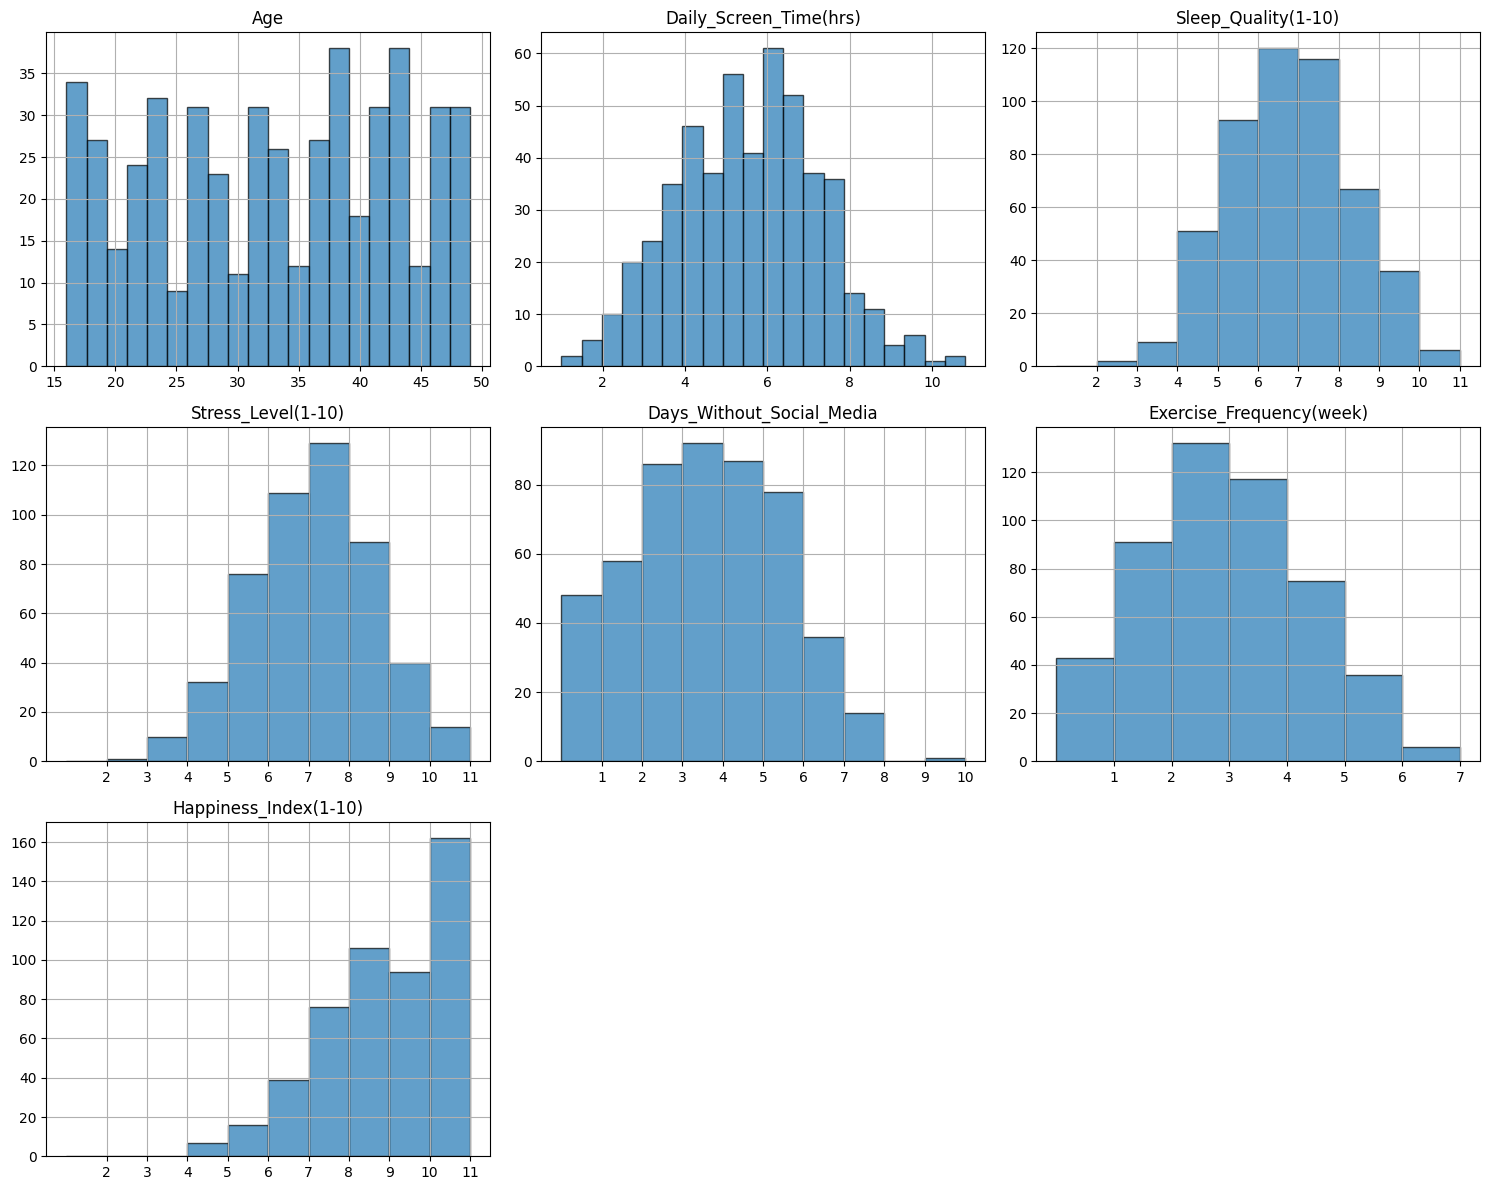

In [4]:

bins_config = {
    'Age': 20,  
    'Daily_Screen_Time(hrs)': 20,
    'Sleep_Quality(1-10)': range(1, 12),
    'Stress_Level(1-10)': range(1, 12),
    'Days_Without_Social_Media': range(0, 11),
    'Exercise_Frequency(week)': range(0, 8),
    'Happiness_Index(1-10)': range(1, 12)
}

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

columns = ['Age', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)', 
          'Stress_Level(1-10)', 'Days_Without_Social_Media', 
          'Exercise_Frequency(week)', 'Happiness_Index(1-10)']

for i, col in enumerate(columns):
    if col in bins_config:
        bins = bins_config[col]
        df[col].hist(bins=bins, ax=axes[i], edgecolor='black', alpha=0.7)
        axes[i].set_title(col)
        
        if isinstance(bins, range):
            axes[i].set_xticks(list(bins)[1:])
    
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Для обнаружения выбросов буду использовать метод IQR

In [16]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return (data < lower_bound) | (data > upper_bound)


age_out = detect_outliers_iqr(df['Age'])
screen_time_out = detect_outliers_iqr(df['Daily_Screen_Time(hrs)'])
sleep_out = detect_outliers_iqr(df['Sleep_Quality(1-10)'])
stress_out = detect_outliers_iqr(df['Stress_Level(1-10)'])
days_wo_sm_out = detect_outliers_iqr(df['Days_Without_Social_Media'])
sport_out = detect_outliers_iqr(df['Exercise_Frequency(week)'])
happiness_out = detect_outliers_iqr(df['Happiness_Index(1-10)'])

print(f'Кол-во выбросов в Age = {sum(age_out)}')
print(f'Кол-во выбросов в Daily_Screen_Time(hrs) = {sum(screen_time_out)}')
print(f'Кол-во выбросов в Sleep_Quality(1-10) = {sum(sleep_out)}')
print(f'Кол-во выбросов в Stress_Level(1-10) = {sum(stress_out)}')
print(f'Кол-во выбросов в Days_Without_Social_Media = {sum(days_wo_sm_out)}')
print(f'Кол-во выбросов в Exercise_Frequency(week) = {sum(sport_out)}')
print(f'Кол-во выбросов в Happiness_Index(1-10) = {sum(happiness_out)}')    

Кол-во выбросов в Age = 0
Кол-во выбросов в Daily_Screen_Time(hrs) = 2
Кол-во выбросов в Sleep_Quality(1-10) = 0
Кол-во выбросов в Stress_Level(1-10) = 1
Кол-во выбросов в Days_Without_Social_Media = 0
Кол-во выбросов в Exercise_Frequency(week) = 2
Кол-во выбросов в Happiness_Index(1-10) = 0


Визуализируем выбросы с помощью диаграммы рассеивания и коробчатых диаграмм

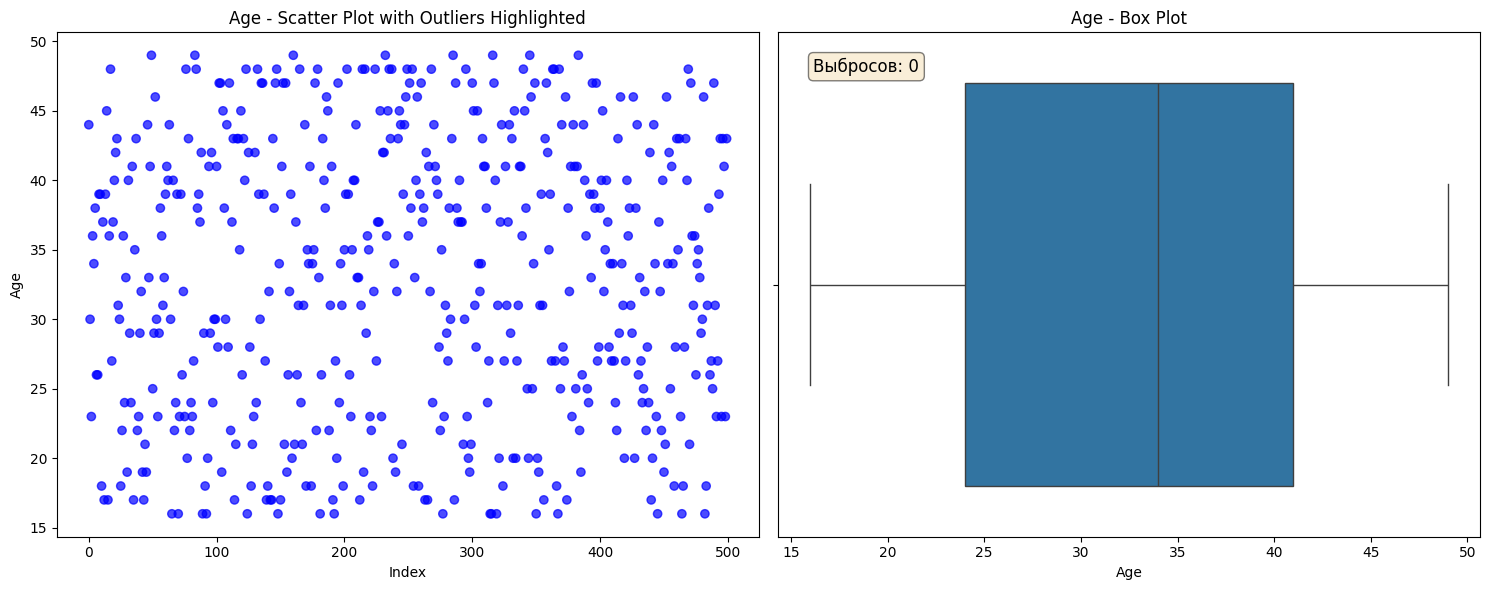

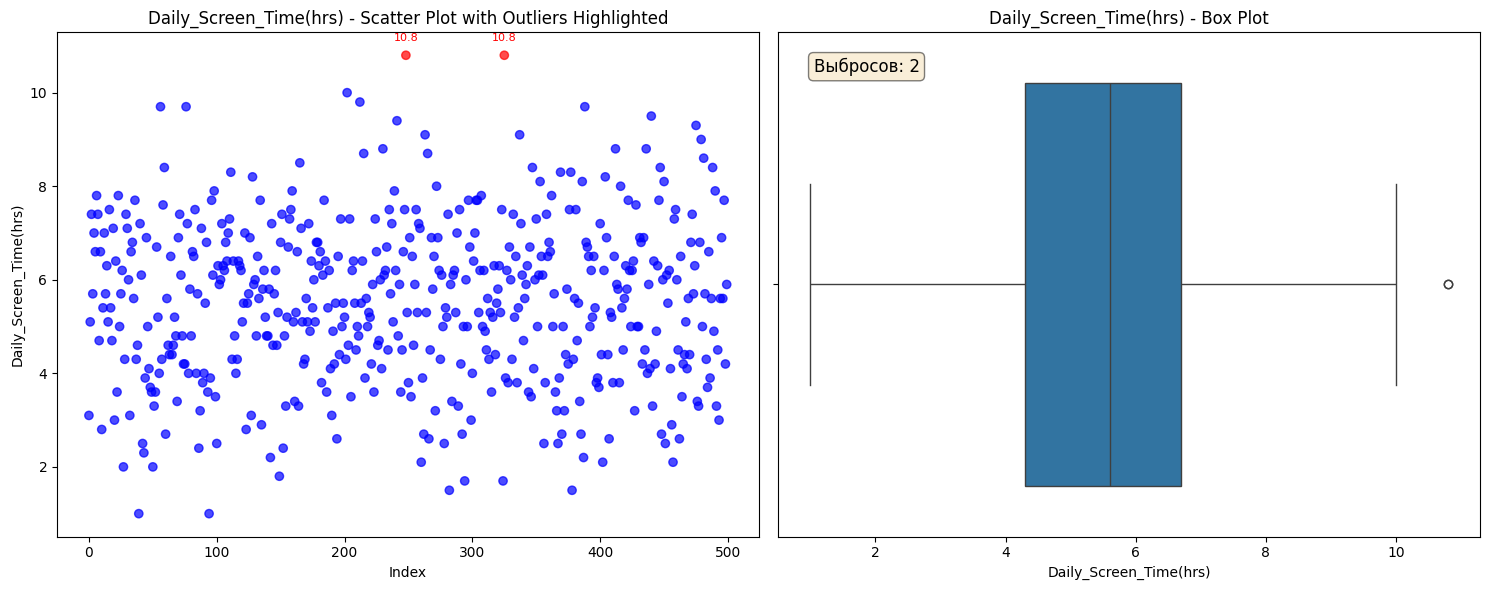


Статистика выбросов для Daily_Screen_Time(hrs):
Количество: 2
Значения: [10.8 10.8]
Индексы: [248, 325]
--------------------------------------------------


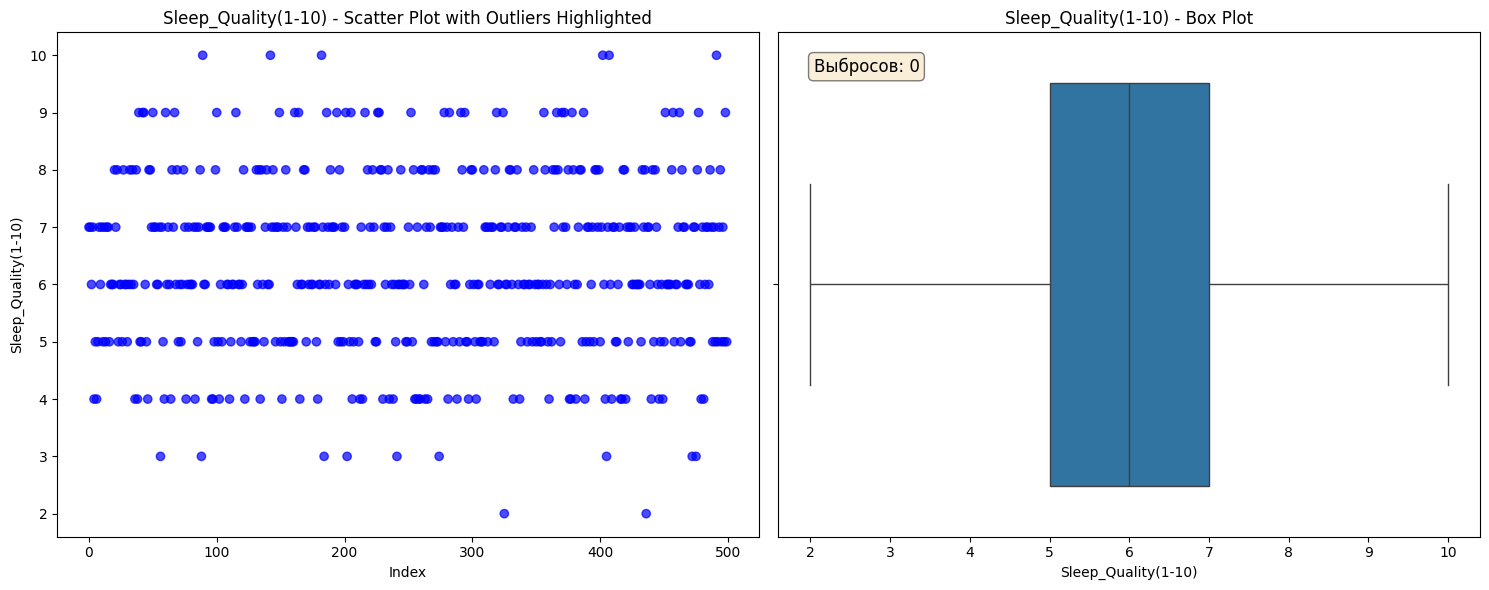

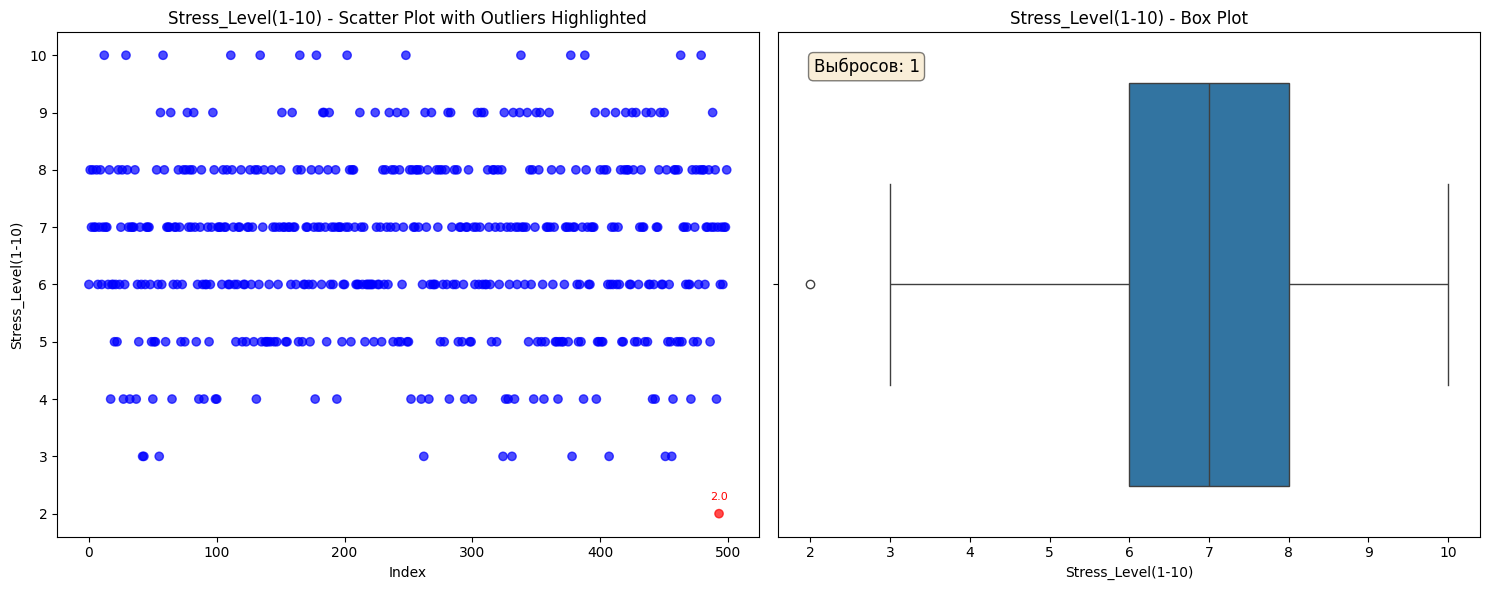


Статистика выбросов для Stress_Level(1-10):
Количество: 1
Значения: [2.]
Индексы: [493]
--------------------------------------------------


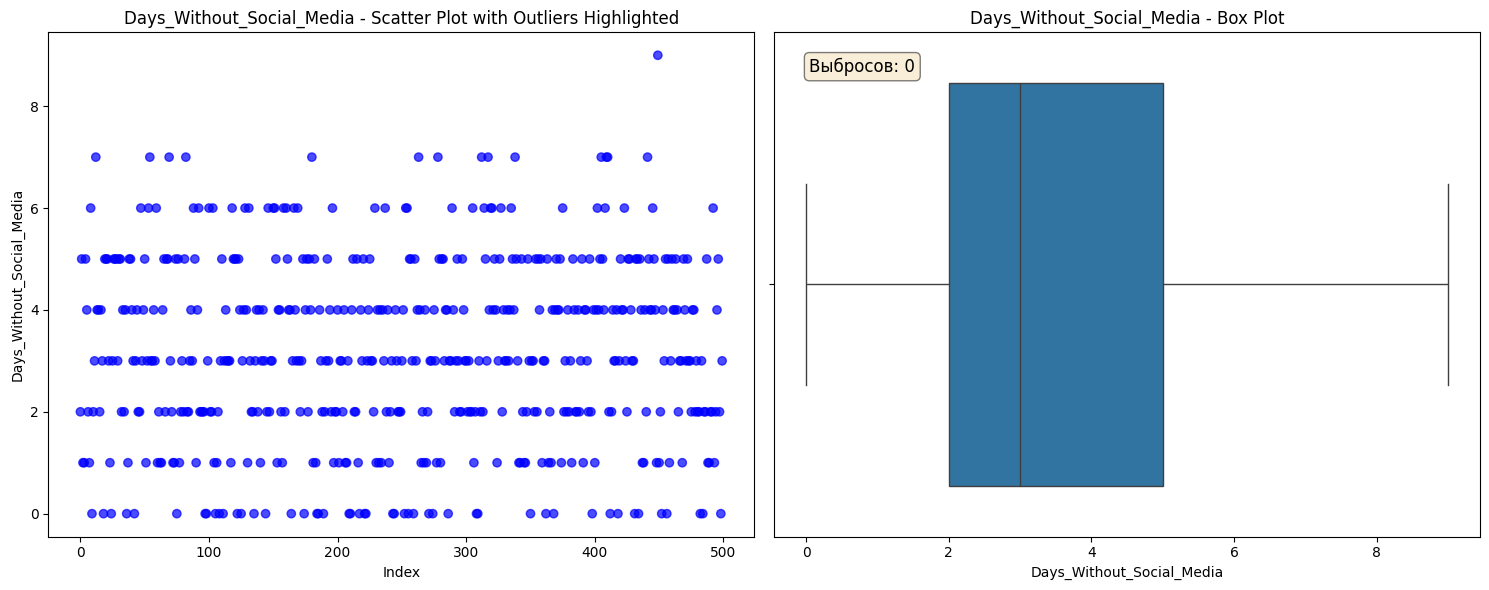

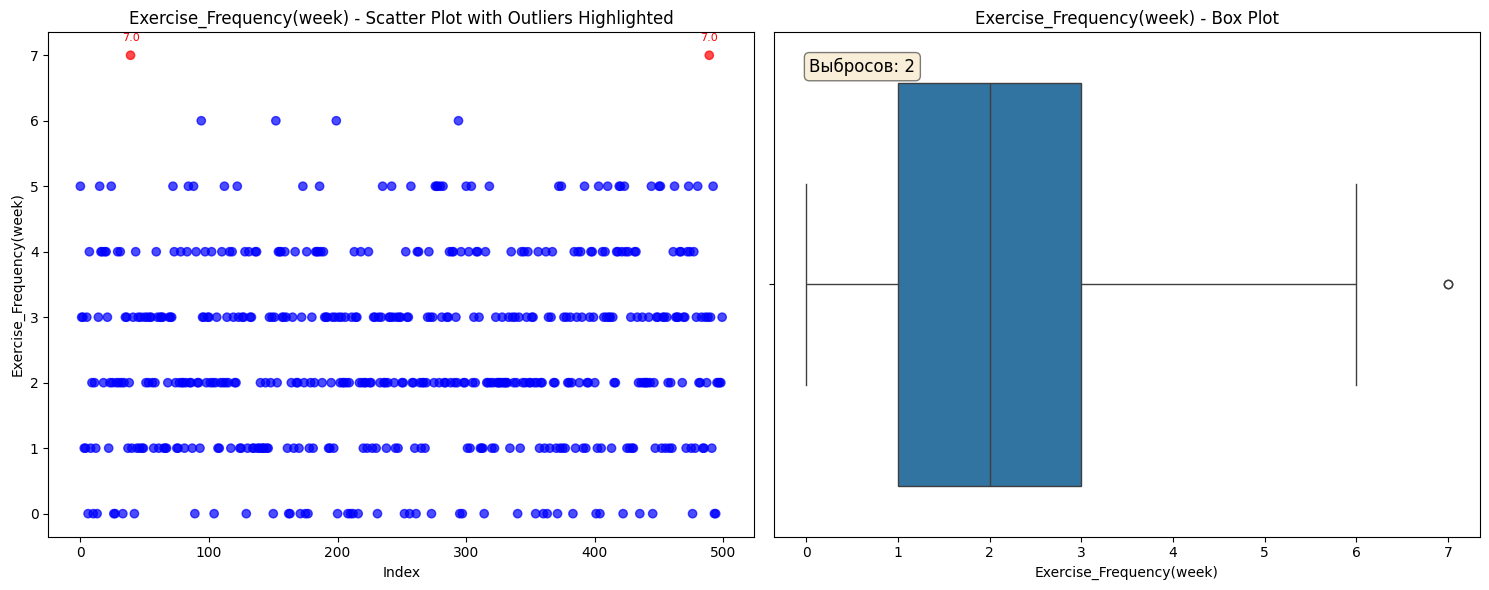


Статистика выбросов для Exercise_Frequency(week):
Количество: 2
Значения: [7. 7.]
Индексы: [39, 489]
--------------------------------------------------


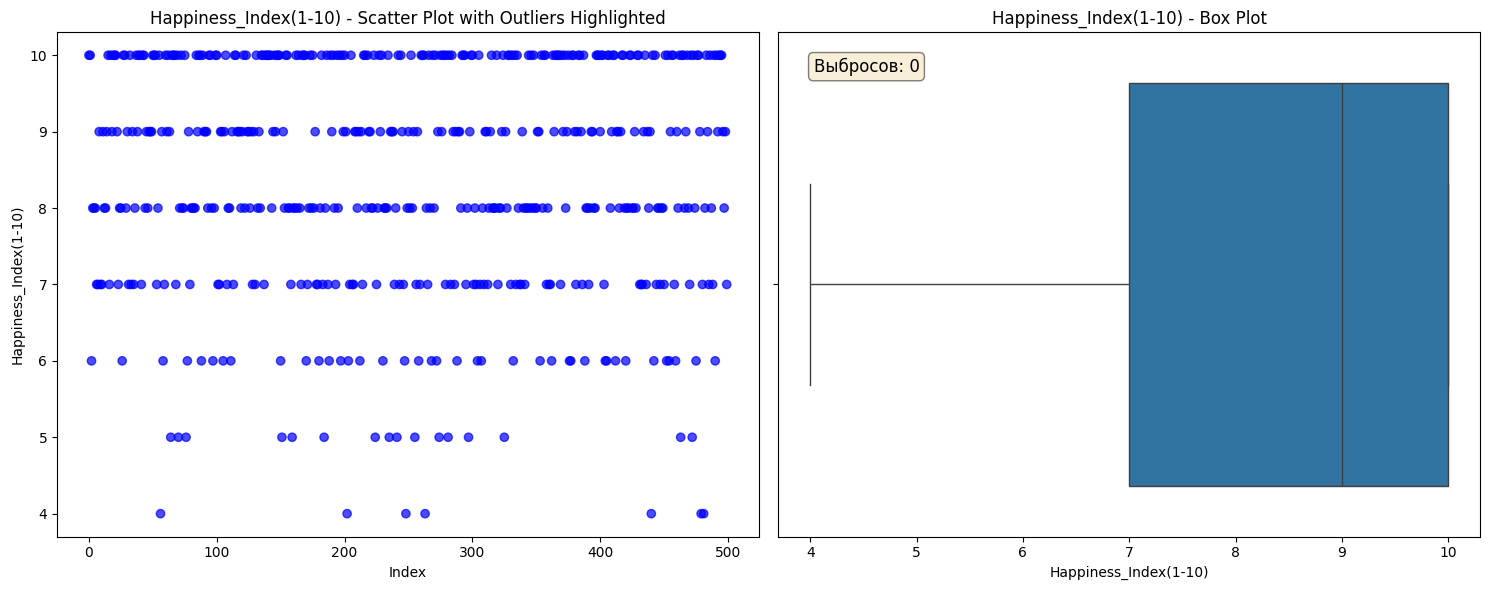

In [17]:
attributes = [
    ('Age', age_out),
    ('Daily_Screen_Time(hrs)', screen_time_out),
    ('Sleep_Quality(1-10)', sleep_out),
    ('Stress_Level(1-10)', stress_out),
    ('Days_Without_Social_Media', days_wo_sm_out),
    ('Exercise_Frequency(week)', sport_out),
    ('Happiness_Index(1-10)', happiness_out)
]

for col, outliers in attributes:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    data = df[col]
    
    colors = ['blue' if not x else 'red' for x in outliers]
    ax1.scatter(range(len(data)), data, c=colors, alpha=0.7)
    ax1.set_title(f'{col} - Scatter Plot with Outliers Highlighted')
    ax1.set_xlabel('Index')
    ax1.set_ylabel(col)
    
    outlier_indices = outliers[outliers].index
    for idx in outlier_indices:
        ax1.annotate(f'{data[idx]:.1f}', 
                    (idx, data[idx]),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center',
                    fontsize=8,
                    color='red')
    
    sns.boxplot(x=data, ax=ax2)
    ax2.set_title(f'{col} - Box Plot')
    ax2.set_xlabel(col)
    
    num_outliers = sum(outliers)
    ax2.text(0.05, 0.95, f'Выбросов: {num_outliers}', 
             transform=ax2.transAxes, fontsize=12,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    if num_outliers > 0:
        outlier_data = data[outliers]
        print(f"\nСтатистика выбросов для {col}:")
        print(f"Количество: {num_outliers}")
        print(f"Значения: {outlier_data.values}")
        print(f"Индексы: {outlier_data.index.tolist()}")
        print("-" * 50)


Пропущенных значений нет